<a href="https://colab.research.google.com/github/MarrinXia/MSSP-607/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import requests
import os
import time
from google.colab import drive

drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/MSSP607/data/"
IMAGES_PATH = os.path.join(DATA_PATH, "downloaded_images/")
os.makedirs(IMAGES_PATH, exist_ok=True)

def download_images_simple(image_urls, category_name, save_path=IMAGES_PATH):
    """
    Picture
    """
    downloaded = 0

    for i, url in enumerate(image_urls):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            filename = f"{category_name}_{i+1}.jpg"
            filepath = os.path.join(save_path, filename)

            with open(filepath, 'wb') as f:
                f.write(response.content)

            downloaded += 1
            print(f"✓ Downloaded {downloaded}/{len(image_urls)}: {filename}")
            time.sleep(0.5)

        except Exception as e:
            print(f"✗ Failed to download image {i+1}: {e}")

    print(f"\n✓ Total downloaded: {downloaded} images")
    return downloaded

# Using Unsplash
cat_image_urls = [
    "https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?w=800",
    "https://images.unsplash.com/photo-1543852786-1cf6624b9987?w=800",
    "https://images.unsplash.com/photo-1495360010541-f48722b34f7d?w=800",
    "https://images.unsplash.com/photo-1478098711619-5ab0b478d6e6?w=800",
    "https://images.unsplash.com/photo-1519052537078-e6302a4968d4?w=800",
]

# Download
download_images_simple(cat_image_urls, "cats")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Downloaded 1/5: cats_1.jpg
✓ Downloaded 2/5: cats_2.jpg
✓ Downloaded 3/5: cats_3.jpg
✓ Downloaded 4/5: cats_4.jpg
✓ Downloaded 5/5: cats_5.jpg

✓ Total downloaded: 5 images


5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Searching for 'cats' images...
Error downloading images: 401 Client Error: Unauthorized for url: https://api.unsplash.com/search/photos?query=cats&page=1&per_page=15

✓ Successfully downloaded 0 images to /content/drive/MyDrive/MSSP607/data/downloaded_images/


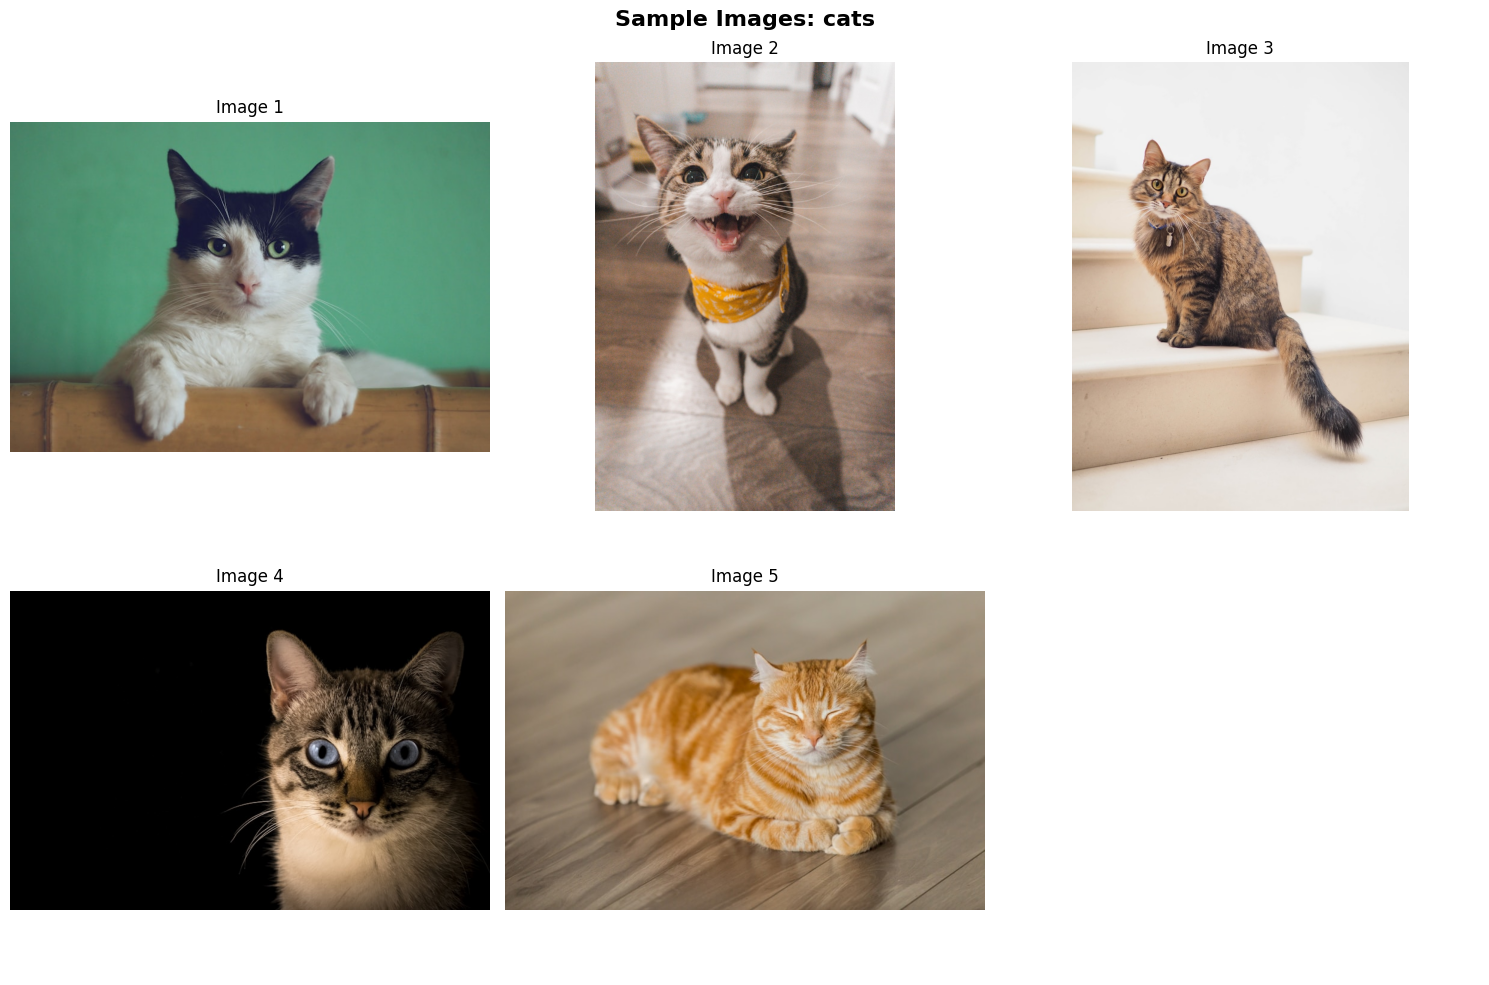


📊 Total images in folder: 5


In [ ]:
# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from pathlib import Path
import time

# 2) Setup paths
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/MSSP607/data/"
IMAGES_PATH = os.path.join(DATA_PATH, "downloaded_images/")

# Create directory if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# 3) Unsplash API Configuration
UNSPLASH_ACCESS_KEY = "YOUR_ACCESS_KEY_HERE"  # Replace with your key

def download_images_unsplash(search_query, num_images=10, save_path=IMAGES_PATH):
    """
    Download images from Unsplash based on search query

    Parameters:
    - search_query: str, the category/keyword to search for
    - num_images: int, number of images to download
    - save_path: str, directory to save images
    """

    base_url = "https://api.unsplash.com/search/photos"
    headers = {"Authorization": f"Client-ID {UNSPLASH_ACCESS_KEY}"}

    downloaded_count = 0
    page = 1

    print(f"Searching for '{search_query}' images...")

    while downloaded_count < num_images:
        # API request parameters
        params = {
            "query": search_query,
            "page": page,
            "per_page": min(30, num_images - downloaded_count)
        }

        try:
            # Search for images
            response = requests.get(base_url, headers=headers, params=params)
            response.raise_for_status()
            data = response.json()

            if not data['results']:
                print("No more images found.")
                break

            # Download each image
            for photo in data['results']:
                if downloaded_count >= num_images:
                    break

                image_url = photo['urls']['regular']
                image_id = photo['id']
                filename = f"{search_query}_{image_id}.jpg"
                filepath = os.path.join(save_path, filename)

                # Download the image
                img_response = requests.get(image_url)
                img_response.raise_for_status()

                # Save the image
                with open(filepath, 'wb') as f:
                    f.write(img_response.content)

                downloaded_count += 1
                print(f"Downloaded {downloaded_count}/{num_images}: {filename}")

                # Be polite to the API
                time.sleep(0.5)

            page += 1

        except requests.exceptions.RequestException as e:
            print(f"Error downloading images: {e}")
            break

    print(f"\n✓ Successfully downloaded {downloaded_count} images to {save_path}")
    return downloaded_count


# 4) Display downloaded images
def display_sample_images(search_query, num_display=6, save_path=IMAGES_PATH):
    """Display a sample of downloaded images"""

    image_files = [f for f in os.listdir(save_path) if f.startswith(search_query)]

    if not image_files:
        print("No images found to display")
        return

    num_display = min(num_display, len(image_files))

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i in range(num_display):
        img_path = os.path.join(save_path, image_files[i])
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}")

    # Hide unused subplots
    for i in range(num_display, len(axes)):
        axes[i].axis('off')

    plt.suptitle(f"Sample Images: {search_query}", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


# 5) Usage Example
search_category = "cats"
num_to_download = 15

# Download images
download_images_unsplash(search_category, num_to_download)

# Display sample images
display_sample_images(search_category, num_display=6)

# Get statistics
all_images = [f for f in os.listdir(IMAGES_PATH) if f.endswith('.jpg')]
print(f"\n📊 Total images in folder: {len(all_images)}")